#Comparación entre algoritmos Dijkstra y A*

In [17]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import heapq
import sys
import random

In [18]:
df_aristas = pd.read_csv("aristas.csv")
df_aristas

,id,source,target,length,foot,car_forward,car_backward,bike_forward,bike_backward,wkt
0,104851469,1209261299,5394543995,147.433722,1,4,0,2,0,"LINESTRING(-75.2164990 -12.0585078, -75.216908..."
1,104851469,5394543995,4150228762,123.394352,1,4,0,2,0,"LINESTRING(-75.2172212 -12.0573874, -75.217328..."
2,104851469,4150228762,1209256646,86.068643,1,4,0,2,0,"LINESTRING(-75.2178111 -12.0564409, -75.218202..."
3,104851469,1209256646,5394544018,99.195577,1,4,0,2,0,"LINESTRING(-75.2182021 -12.0557689, -75.218673..."
4,104851469,5394544018,1043251501,701.253849,1,4,0,2,0,"LINESTRING(-75.2186738 -12.0550065, -75.219140..."
...,...,...,...,...,...,...,...,...,...,...
79,559267886,1209259338,5394543998,100.946930,1,1,1,2,2,"LINESTRING(-75.2195249 -12.0565551, -75.219046..."
80,559267887,5394544004,5394544003,56.109782,1,1,1,2,2,"LINESTRING(-75.2214079 -12.0570883, -75.221091..."
81,559267888,5394544009,5394544007,107.215487,1,1,1,2,2,"LINESTRING(-75.2213640 -12.0581984, -75.220599..."
82,559267888,5394544007,5394544005,108.105147,1,1,1,2,2,"LINESTRING(-75.2205667 -12.0576398, -75.220514..."


In [19]:
df_vertices = pd.read_csv("nodos.csv")
df_vertices

,id,lon,lat
0,1209250656,-75.217439,-12.055316
1,1209259338,-75.219525,-12.056555
2,5394543995,-75.217221,-12.057387
3,1209256161,-75.219088,-12.056291
4,5394543983,-75.220496,-12.056532
...,...,...,...
57,5394544003,-75.221092,-12.057486
58,5394543993,-75.220840,-12.059021
59,5394543977,-75.218573,-12.056720
60,5394544001,-75.219448,-12.057576


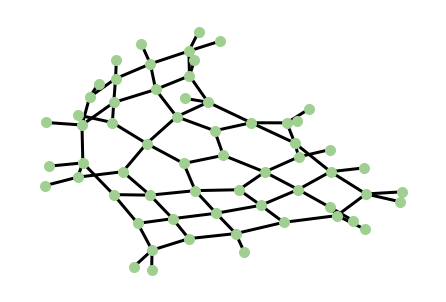

In [20]:
options = {
    'node_color': '#A0D091',
    'node_size': 100,
    'width': 3,
    'font_weight': 'bold',
    #'with_labels': True,
}
grafo = nx.Graph()
for i in range(df_aristas.shape[0]):
  grafo.add_edge(df_aristas["source"][i], df_aristas["target"][i])
nx.draw(grafo, **options)

In [21]:
grafo.edges

EdgeView([(1209261299, 5394543995), (5394543995, 4150228762), (5394543995, 5394543996), (4150228762, 1209256646), (4150228762, 5396339074), (4150228762, 1209249131), (1209256646, 5394544018), (1209256646, 1209250656), (1209256646, 1209251752), (5394544018, 1043251501), (5394544018, 5453701874), (5394544018, 1209248504), (1209248504, 5394544017), (1209248504, 1043251560), (1209248504, 1209251752), (5394544017, 5394544015), (5394544017, 5394533463), (5394544017, 1209256161), (5394544015, 5394544016), (5394544015, 5394533443), (5394544015, 1209254527), (5394544016, 5394547723), (5394544016, 5394533443), (5394544016, 5394543982), (5394547723, 5394543975), (5394547723, 5394533481), (5394547723, 5394533447), (5394543975, 5394533437), (5394543975, 5394533487), (5394543975, 5394533449), (1209248070, 5394533443), (5394533443, 5394533474), (1209254527, 1209256161), (1209254527, 1209259338), (1209249131, 5394543976), (1209249131, 1209251752), (1209249131, 5394543996), (1209251752, 1209256161), (1

##Clase grafo

In [22]:
class Vertex:
  def __init__(self, node):
    rand = random.randrange(9000,100000)
    self.id = node
    self.adjacent = {}
    # Distancia infinito para todos los nodos (infinito es un random grande)
    self.distance = rand
    # Mark all nodes unvisited        
    self.visited = False  
    # Predecessor
    self.previous = None

  def agregar_vecino(self, neighbor, weight=0):
    self.adjacent[neighbor] = weight

  def obtener_conexiones(self):
    return self.adjacent.keys()  

  def obtener_id(self):
    return self.id

  def obtener_peso(self, neighbor):
    return self.adjacent[neighbor]

  def agregar_distancia(self, dist):
    self.distance = dist

  def obtener_distancia(self):
    return self.distance

  def agregar_previous(self, prev):
    self.previous = prev

  def visitado(self):
    self.visited = True

  def __str__(self):
    return str(self.id) + ' adjacent: ' + str([x.id for x in self.adjacent])

class Graph:
  def __init__(self):
    self.vert_dict = {}
    self.num_vertices = 0

  def __iter__(self):
    return iter(self.vert_dict.values())

  def agregar_vertice(self, node):
    self.num_vertices = self.num_vertices + 1
    new_vertex = Vertex(node)
    self.vert_dict[node] = new_vertex
    return new_vertex

  def obtener_vertice(self, n):
    if n in self.vert_dict:
      return self.vert_dict[n]
    else:
      return None

  def agregar_arista(self, frm, to, cost = 0):
    if frm not in self.vert_dict:
      self.agregar_vertice(frm)
    if to not in self.vert_dict:
      self.agregar_vertice(to)

    self.vert_dict[frm].agregar_vecino(self.vert_dict[to], cost)
    self.vert_dict[to].agregar_vecino(self.vert_dict[frm], cost)

  def obtener_vertices(self):
    return self.vert_dict.keys()

  def agregar_previous(self, current):
    self.previous = current

  def obtener_previous(self, current):
    return self.previous

##Algoritmo Dijkstra

In [23]:
def shortest(v, path):
    ''' halla el camino mínimo usando prev[]'''
    if v.previous:
        path.append(v.previous.obtener_id())
        shortest(v.previous, path)
    return


def dijkstra(aGraph, start, target):
  '''Algoritmo de Dijkstra'''
  # distancia del nodo inicial = 0
  start.agregar_distancia(0)

  # se colocarán todas las tuplas (distancia,vertice) en una cola de prioridad (unvisited_queue)
  unvisited_queue = []
  cont = 0
  dic = {} #diccionario donde almaceno id,vertice
  for v in aGraph:
    dic[cont] = v
    unvisited_queue.append((v.obtener_distancia(),cont))
    cont = cont + 1
  heapq.heapify(unvisited_queue)

  while len(unvisited_queue):
      # Hacemos pop al vértice con menor distancia
      uv = heapq.heappop(unvisited_queue)
      current = dic.get(uv[1])
      current.visitado()

      # Para next en v.adjacent:
      for next in current.adjacent:
          if next.visited:
              continue
          new_dist = current.obtener_distancia() + current.obtener_peso(next)
          
          if new_dist < next.obtener_distancia():
              next.agregar_distancia(new_dist)
              next.agregar_previous(current)
              print("Actualizado : Actual = %s next = %s nueva_dist = %s" \
                      %(current.obtener_id(), next.obtener_id(), next.obtener_distancia()))
          else:
              print('No actualizado : Actual = %s next = %s nueva_dist = %s' \
                      %(current.obtener_id(), next.obtener_id(), next.obtener_distancia()))

      #Refresh de la cola de prioridad
      # 1. Hacemos pop de todos los items
      while len(unvisited_queue):
          heapq.heappop(unvisited_queue)
      # 2. Ponemos todos los vértices no visitados en la cola de prioridad
      cont = 0
      dic = {} #diccionario donde almaceno id,vertice
      for v in aGraph:
        if not v.visited:
          dic[cont] = v
          unvisited_queue.append((v.obtener_distancia(),cont))
          cont = cont + 1
      heapq.heapify(unvisited_queue)

In [24]:
g = Graph()
for i in range(df_vertices.shape[0]):
  g.agregar_vertice(df_vertices["id"][i])

for j in range(df_aristas.shape[0]):
  g.agregar_arista(df_aristas["source"][j],df_aristas["target"][j],df_aristas["length"][j])

#for v in g:
  #for w in v.get_connections():
    #vid = v.get_id()
    #wid = w.get_id()
    #print('( %s , %s, %3d)'  % ( vid, wid, v.get_weight(w)))

dijkstra(g, g.obtener_vertice(1209250656), g.obtener_vertice(5394533442)) 

target = g.obtener_vertice(5394533442)
path = [target.obtener_id()]
shortest(target, path)
print('El camino más corto es: %s' %(path[::-1]))

Actualizado : Actual = 1209250656 next = 1209256646 nueva_dist = 97.17651199308118
Actualizado : Actual = 1209256646 next = 4150228762 nueva_dist = 183.2451552803916
Actualizado : Actual = 1209256646 next = 5394544018 nueva_dist = 196.37208883464677
Actualizado : Actual = 1209256646 next = 1209251752 nueva_dist = 105.45510812144863
Actualizado : Actual = 1209251752 next = 1209256161 nueva_dist = 209.76394739556181
Actualizado : Actual = 1209251752 next = 1209248504 nueva_dist = 204.33656562291475
Actualizado : Actual = 1209251752 next = 1209249131 nueva_dist = 192.5992452102626
Actualizado : Actual = 4150228762 next = 5394543995 nueva_dist = 306.6395070165605
Actualizado : Actual = 4150228762 next = 5396339074 nueva_dist = 755.8161117234529
Actualizado : Actual = 4150228762 next = 1209249131 nueva_dist = 189.15721588085262
Actualizado : Actual = 1209249131 next = 5394543976 nueva_dist = 247.76253750153072
Actualizado : Actual = 1209249131 next = 5394543996 nueva_dist = 311.535667052690